In [1]:
from sklearn.preprocessing import StandardScaler # Normalizando os dados
from sklearn.decomposition import PCA # Redução de dimensionalidade
from sklearn import datasets # Banco de exemplos

In [2]:
# Busca base com dígitos
digits = datasets.load_digits()

In [3]:
print(digits.images)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

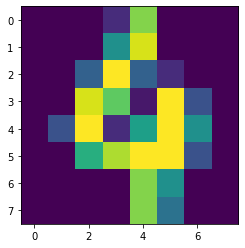

In [4]:
import matplotlib.pyplot as plt

#print(digits.images[100])

# Plota em tela a imagem arr na posição 100
plt.imshow(digits.images[100])

In [5]:
# Saída na posição 100
digits.target[100]

4

In [6]:
# Preparando dados da base para treino e normalizando as imagens
X = StandardScaler().fit_transform(digits.data) 

In [7]:
# Instancia a redução de dimensionalidade
# Create a PCA that will retain 99% of the variance
# n_components=0.99 -> mesmo após a redução da dimensão, teremos 99% dos dados originais preservados
# Mantém a variância dos dados
pca = PCA(n_components=0.99, whiten=True)

In [8]:
# Conduct PCA
X_pca = pca.fit_transform(X) # Transforma as features reduzindo a dimensionalidade

In [9]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 64
Reduced number of features: 54


In [10]:
y = digits.target

In [11]:
from sklearn.model_selection import train_test_split

# random_state=2 -> usando esta característica para fazer com que o train_test_split não fique randômico
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2) # Separando var. pra treino e teste

In [12]:
# Modelo KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) # Treinando

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred=neigh.predict(X_test) # Testando predição

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### Curva ROC 
ROC é uma técnica para visualizar, avaliar, organizar e selecionar classificadores baseado em suas
performances. Para realizar estas análises, gráficos ROC podem mostrar o limiar entre taxas de
acertos e alarmes falsos (taxas de erros) dos classificadores

In [15]:
# fpr - False positiva rate (quantos falsos positivos existem)
# tpr - True positive rate (quanto o modelo acerta)
# thresholds - os modelos não dão valor exato, são probabilísticos, 
#              o thresholds cria uma métrica para dizer qndo um elemento pertence ou não à uma classe
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       0.88      1.00      0.94        44
           2       0.94      1.00      0.97        31
           3       0.94      0.94      0.94        36
           4       1.00      0.80      0.89        35
           5       0.97      0.91      0.94        43
           6       0.97      0.97      0.97        35
           7       0.93      1.00      0.96        40
           8       0.97      0.92      0.94        36
           9       0.92      0.86      0.89        28

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



In [17]:
print(confusion_matrix(y_test,y_pred))

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  1  1 34  0  0  0  0  0  0]
 [ 1  3  0  0 28  0  0  2  0  1]
 [ 1  0  1  2  0 39  0  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  2  0  0  0  0  0  0 33  1]
 [ 0  0  0  0  0  1  1  1  1 24]]


In [18]:
#!pip install scikit-plot
import scikitplot as skplt 

In [19]:
y_test_class_0=[1 if y==0 else 0 for y in y_test]
y_pred_class_0=[1 if y==0 else 0 for y in y_pred]

#y_pred_class_0

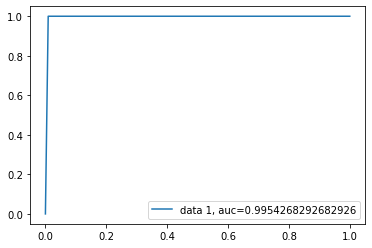

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_class_0, y_pred_class_0)
auc = metrics.roc_auc_score(y_test_class_0, y_pred_class_0)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [21]:
y_test_class_1=[1 if y==1 else 0 for y in y_test]
y_pred_class_1=[1 if y==1 else 0 for y in y_pred]

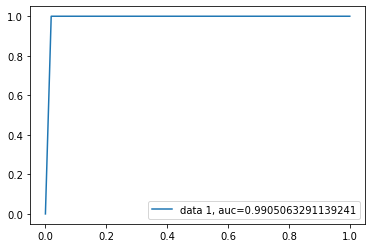

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_class_1, y_pred_class_1)
auc = metrics.roc_auc_score(y_test_class_1, y_pred_class_1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()